🚀 PROJET SPAM DETECTION - EXPLORATION DES DONNÉES

📂 1. CHARGEMENT DES DONNÉES
------------------------------------------------------------
✅ Données chargées avec encodage latin-1

📊 Aperçu des données brutes :
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

✅ Colonnes nettoyées : ['label', 'message']
✅ Nombre total de messages : 5,572

📋 2. INFORMATIONS SUR LE DATASET
------------------------------------------------------------

🔍 Types de donnée

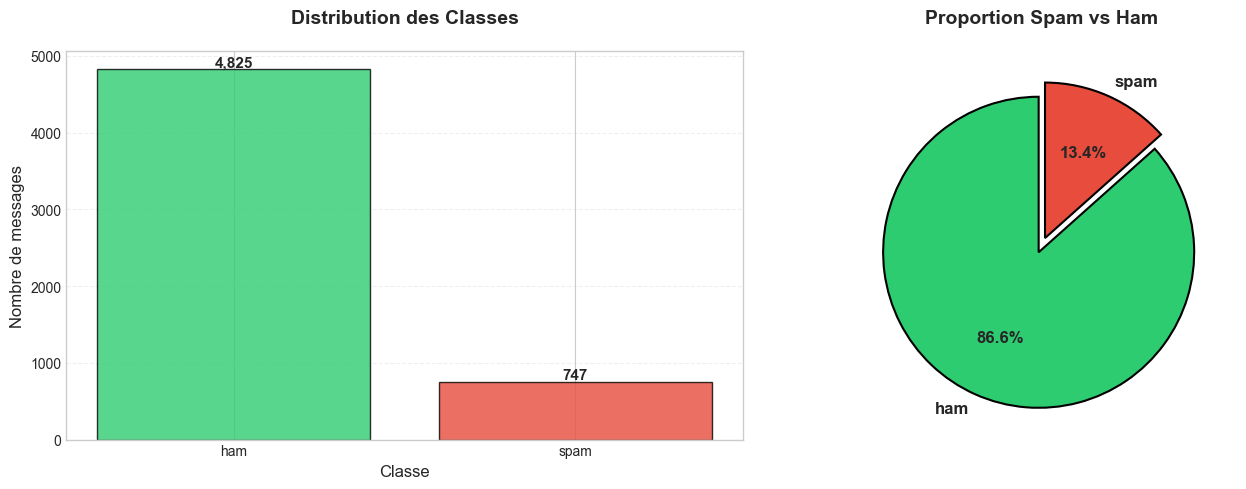


📏 4. ANALYSE DE LA LONGUEUR DES MESSAGES
------------------------------------------------------------

Statistiques globales :
        char_count   word_count  avg_word_length
count  5572.000000  5572.000000      5572.000000
mean     80.118808    15.494436         5.187653
std      59.690841    11.329427         1.136103
min       2.000000     1.000000         2.000000
25%      36.000000     7.000000         4.583333
50%      61.000000    12.000000         5.000000
75%     121.000000    23.000000         5.600000
max     910.000000   171.000000        49.000000

📊 Statistiques par classe :
       char_count                   word_count                    \
             mean median        std       mean median        std   
label                                                              
ham     71.023627   52.0  58.016023  14.200622   11.0  11.424511   
spam   138.866131  149.0  29.183082  23.851406   25.0   5.811898   

      avg_word_length                      
                 

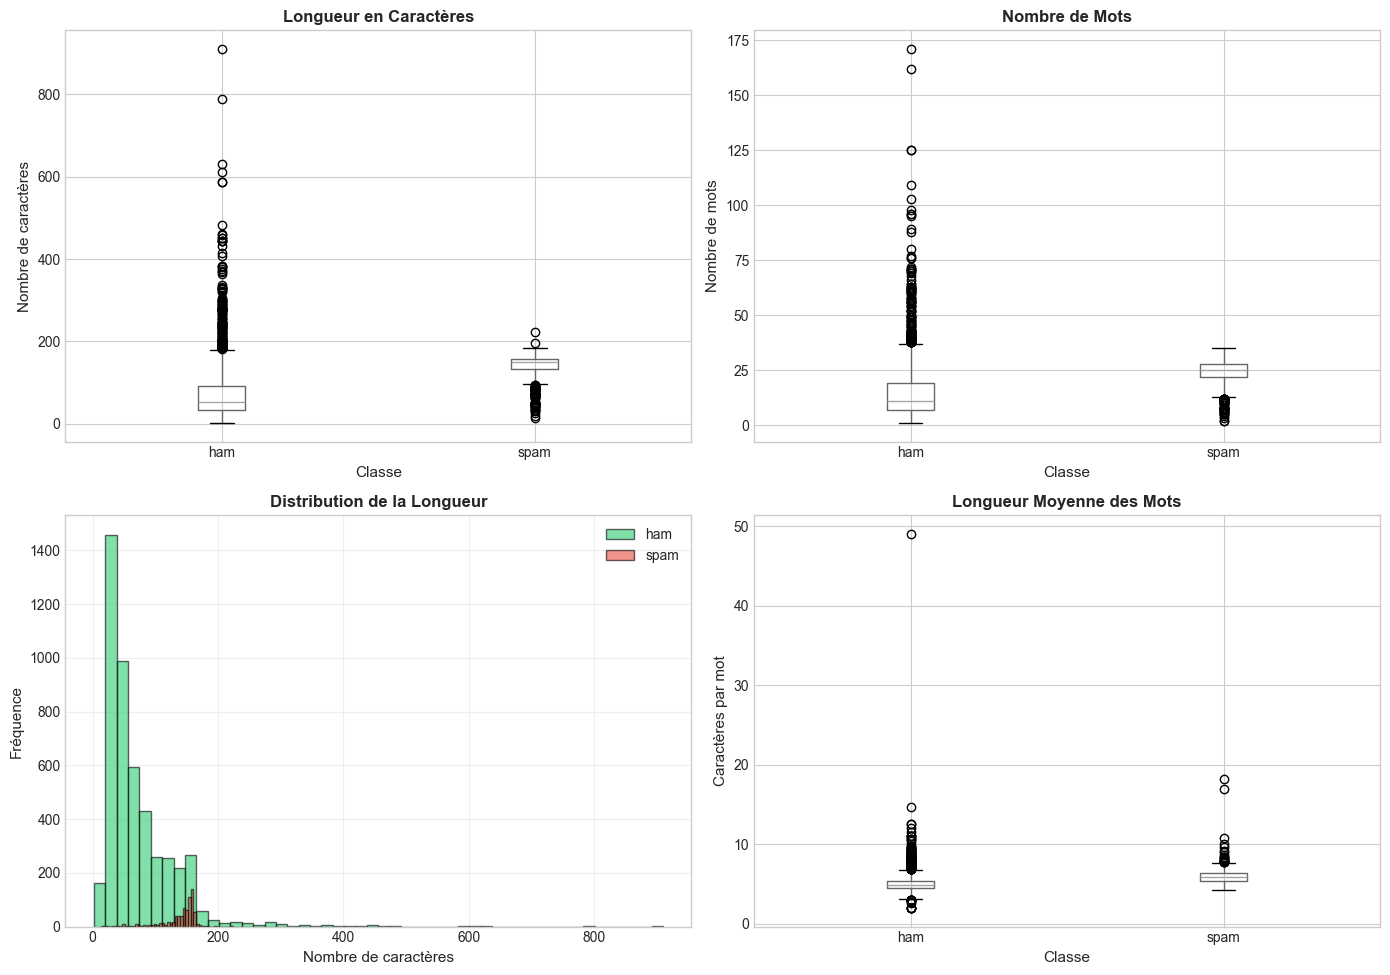


📝 5. EXEMPLES DE MESSAGES
------------------------------------------------------------

🚨 Exemples de SPAM :

  1. [159 chars, 29 words]
     Summers finally here! Fancy a chat or flirt with sexy singles in yr area? To get MATCHED up just reply SUMMER now. Free 2 Join. OptOut txt STOP Help08714742804

  2. [154 chars, 30 words]
     This is the 2nd time we have tried 2 contact u. U have won the 750 Pound prize. 2 claim is easy, call 08718726970 NOW! Only 10p per min. BT-national-rate 

  3. [154 chars, 32 words]
     Get ur 1st RINGTONE FREE NOW! Reply to this msg with TONE. Gr8 TOP 20 tones to your phone every week just å£1.50 per wk 2 opt out send STOP 08452810071 16

✉️  Exemples de HAM (légitimes) :

  1. [92 chars, 12 words]
     I am late,so call you tomorrow morning.take care sweet dreams....u and me...ummifying...bye.

  2. [83 chars, 20 words]
     U r too much close to my heart. If u go away i will be shattered. Plz stay with me.

  3. [22 chars, 3 words]
     Wait  &lt;#&gt

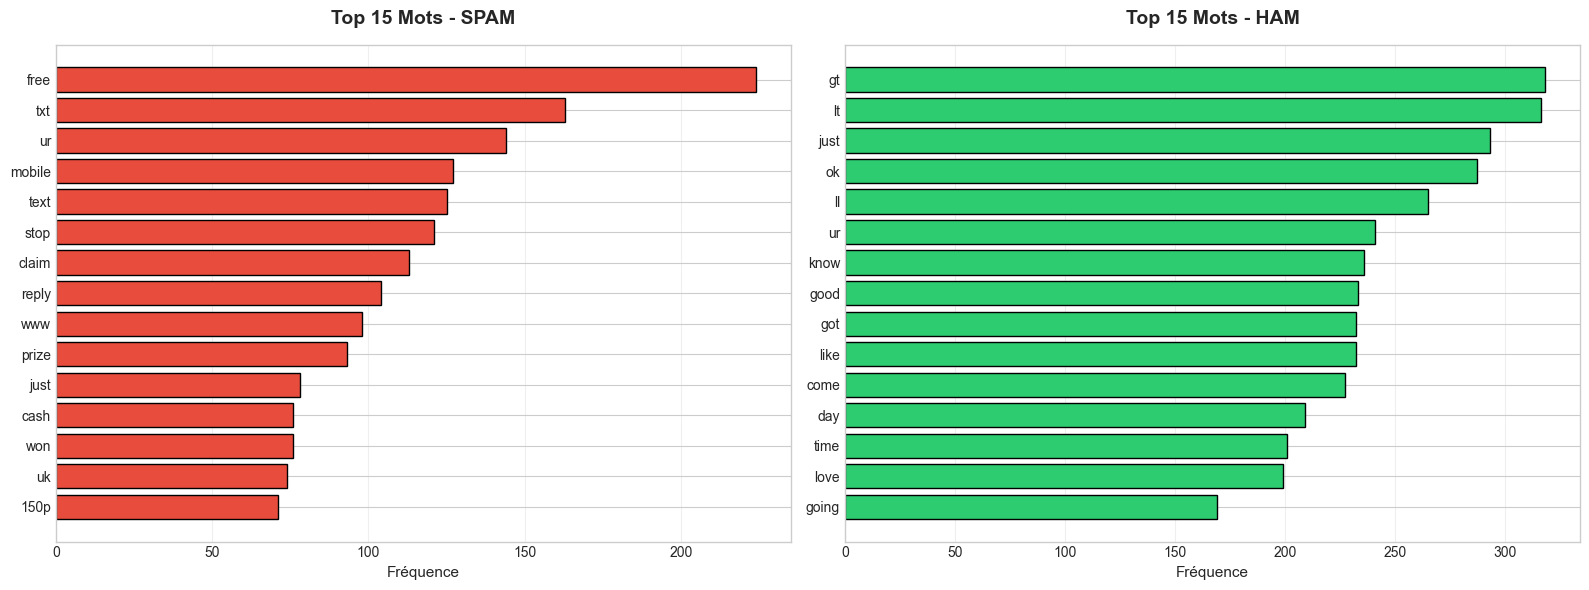


💾 7. SAUVEGARDE DES DONNÉES
------------------------------------------------------------
✅ Données nettoyées sauvegardées : data/spam_clean.csv

✅ EXPLORATION TERMINÉE - RÉSUMÉ

📊 STATISTIQUES CLÉS :
   • Total messages      : 5,572
   • Messages SPAM       : 747 (13.41%)
   • Messages HAM        : 4,825 (86.59%)

📏 LONGUEUR MOYENNE :
   • SPAM : 139 caractères
   • HAM  : 71 caractères

🎯 OBSERVATIONS :
   • Classes déséquilibrées ⚠️
   • Les spams sont plus longs que les messages légitimes
   • Mots discriminants identifiés (free, win, call, etc.)

📁 FICHIERS GÉNÉRÉS :
   • data/spam_clean.csv
   • reports/class_distribution.png
   • reports/message_length_analysis.png
   • reports/top_words.png

🚀 PROCHAINE ÉTAPE : Prétraitement et Feature Engineering


In [1]:
# 📧 SPAM DETECTION - Exploration des Données
# Niveau MLOps 0 - Approche Manuelle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

print("="*60)
print("🚀 PROJET SPAM DETECTION - EXPLORATION DES DONNÉES")
print("="*60)

# ============================================
# 1. CHARGEMENT ET NETTOYAGE
# ============================================

print("\n📂 1. CHARGEMENT DES DONNÉES")
print("-"*60)

# Charger les données (essayer différents encodages)
try:
    df = pd.read_csv('../data/spam.csv', encoding='latin-1')
    print("✅ Données chargées avec encodage latin-1")
except:
    try:
        df = pd.read_csv('../data/spam.csv', encoding='utf-8')
        print("✅ Données chargées avec encodage utf-8")
    except:
        print("❌ Erreur de chargement. Vérifie le chemin du fichier.")
        raise

# Afficher les premières lignes
print("\n📊 Aperçu des données brutes :")
print(df.head())

# Nettoyer les colonnes
df = df.iloc[:, :2]  # Garder seulement les 2 premières colonnes
df.columns = ['label', 'message']

print(f"\n✅ Colonnes nettoyées : {list(df.columns)}")
print(f"✅ Nombre total de messages : {len(df):,}")

# ============================================
# 2. INFORMATIONS GÉNÉRALES
# ============================================

print("\n📋 2. INFORMATIONS SUR LE DATASET")
print("-"*60)

print("\n🔍 Types de données :")
print(df.dtypes)

print("\n🔍 Valeurs manquantes :")
missing = df.isnull().sum()
print(missing)
if missing.sum() == 0:
    print("✅ Aucune valeur manquante !")

print("\n🔍 Valeurs uniques par colonne :")
print(df.nunique())

# ============================================
# 3. DISTRIBUTION DES CLASSES
# ============================================

print("\n📊 3. DISTRIBUTION DES CLASSES")
print("-"*60)

class_dist = df['label'].value_counts()
class_pct = df['label'].value_counts(normalize=True) * 100

print("\nNombre de messages par classe :")
for label, count in class_dist.items():
    pct = class_pct[label]
    print(f"  {label:8s} : {count:5,} messages ({pct:.2f}%)")

# Vérifier le déséquilibre
spam_ratio = class_pct['spam']
print(f"\n⚠️  Ratio de spam : {spam_ratio:.2f}%")
if spam_ratio < 20:
    print("❗ Classes déséquilibrées (imbalanced) - À prendre en compte !")
else:
    print("✅ Classes relativement équilibrées")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique en barres
colors = ['#2ecc71', '#e74c3c']
bars = axes[0].bar(class_dist.index, class_dist.values, color=colors, alpha=0.8, edgecolor='black')
axes[0].set_title('Distribution des Classes', fontsize=14, fontweight='bold', pad=20)
axes[0].set_xlabel('Classe', fontsize=12)
axes[0].set_ylabel('Nombre de messages', fontsize=12)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Ajouter les valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

# Pie chart
explode = (0.05, 0.05)
axes[1].pie(class_dist.values, labels=class_dist.index, autopct='%1.1f%%',
           colors=colors, startangle=90, explode=explode,
           textprops={'fontsize': 12, 'fontweight': 'bold'},
           wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
axes[1].set_title('Proportion Spam vs Ham', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../reports/class_distribution.png', dpi=300, bbox_inches='tight')
print("\n💾 Graphique sauvegardé : reports/class_distribution.png")
plt.show()

# ============================================
# 4. ANALYSE DE LA LONGUEUR DES MESSAGES
# ============================================

print("\n📏 4. ANALYSE DE LA LONGUEUR DES MESSAGES")
print("-"*60)

# Calculer les statistiques
df['char_count'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(x.split()))
df['avg_word_length'] = df['char_count'] / df['word_count']

print("\nStatistiques globales :")
stats = df[['char_count', 'word_count', 'avg_word_length']].describe()
print(stats)

print("\n📊 Statistiques par classe :")
stats_by_class = df.groupby('label')[['char_count', 'word_count', 'avg_word_length']].agg(['mean', 'median', 'std'])
print(stats_by_class)

# Analyse comparative
print("\n🔍 Comparaison Spam vs Ham :")
spam_avg = df[df['label']=='spam']['char_count'].mean()
ham_avg = df[df['label']=='ham']['char_count'].mean()
print(f"  Longueur moyenne SPAM : {spam_avg:.1f} caractères")
print(f"  Longueur moyenne HAM  : {ham_avg:.1f} caractères")
print(f"  Différence : {abs(spam_avg - ham_avg):.1f} caractères ({((spam_avg/ham_avg - 1)*100):.1f}%)")

# Visualisation
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Boxplot - Nombre de caractères
df.boxplot(column='char_count', by='label', ax=axes[0,0])
axes[0,0].set_title('Longueur en Caractères', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Classe', fontsize=11)
axes[0,0].set_ylabel('Nombre de caractères', fontsize=11)

# Boxplot - Nombre de mots
df.boxplot(column='word_count', by='label', ax=axes[0,1])
axes[0,1].set_title('Nombre de Mots', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Classe', fontsize=11)
axes[0,1].set_ylabel('Nombre de mots', fontsize=11)

# Histogramme - Distribution des longueurs
for label, color in zip(['ham', 'spam'], ['#2ecc71', '#e74c3c']):
    data = df[df['label']==label]['char_count']
    axes[1,0].hist(data, bins=50, alpha=0.6, label=label, color=color, edgecolor='black')
axes[1,0].set_title('Distribution de la Longueur', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Nombre de caractères', fontsize=11)
axes[1,0].set_ylabel('Fréquence', fontsize=11)
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)

# Boxplot - Longueur moyenne des mots
df.boxplot(column='avg_word_length', by='label', ax=axes[1,1])
axes[1,1].set_title('Longueur Moyenne des Mots', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Classe', fontsize=11)
axes[1,1].set_ylabel('Caractères par mot', fontsize=11)

plt.suptitle('')
plt.tight_layout()
plt.savefig('../reports/message_length_analysis.png', dpi=300, bbox_inches='tight')
print("\n💾 Graphique sauvegardé : reports/message_length_analysis.png")
plt.show()

# ============================================
# 5. EXEMPLES DE MESSAGES
# ============================================

print("\n📝 5. EXEMPLES DE MESSAGES")
print("-"*60)

print("\n🚨 Exemples de SPAM :")
spam_samples = df[df['label']=='spam'].sample(3, random_state=42)
for i, (idx, row) in enumerate(spam_samples.iterrows(), 1):
    print(f"\n  {i}. [{len(row['message'])} chars, {len(row['message'].split())} words]")
    print(f"     {row['message'][:200]}{'...' if len(row['message']) > 200 else ''}")

print("\n✉️  Exemples de HAM (légitimes) :")
ham_samples = df[df['label']=='ham'].sample(3, random_state=42)
for i, (idx, row) in enumerate(ham_samples.iterrows(), 1):
    print(f"\n  {i}. [{len(row['message'])} chars, {len(row['message'].split())} words]")
    print(f"     {row['message'][:200]}{'...' if len(row['message']) > 200 else ''}")

# ============================================
# 6. ANALYSE DES MOTS FRÉQUENTS
# ============================================

print("\n🔤 6. ANALYSE DES MOTS FRÉQUENTS")
print("-"*60)

from sklearn.feature_extraction.text import CountVectorizer

# Vectorizer simple (sans stop words pour l'instant)
vectorizer = CountVectorizer(max_features=15, stop_words='english', lowercase=True)

# Top mots SPAM
spam_msgs = df[df['label']=='spam']['message']
spam_matrix = vectorizer.fit_transform(spam_msgs)
spam_words = dict(zip(vectorizer.get_feature_names_out(), 
                      spam_matrix.toarray().sum(axis=0)))

# Top mots HAM
ham_msgs = df[df['label']=='ham']['message']
ham_matrix = vectorizer.fit_transform(ham_msgs)
ham_words = dict(zip(vectorizer.get_feature_names_out(), 
                     ham_matrix.toarray().sum(axis=0)))

print("\n📊 Top 15 mots dans les SPAM :")
spam_sorted = sorted(spam_words.items(), key=lambda x: x[1], reverse=True)
for word, count in spam_sorted:
    print(f"  {word:15s} : {count:4d}")

print("\n📊 Top 15 mots dans les HAM :")
ham_sorted = sorted(ham_words.items(), key=lambda x: x[1], reverse=True)
for word, count in ham_sorted:
    print(f"  {word:15s} : {count:4d}")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# SPAM words
words_s, counts_s = zip(*spam_sorted)
axes[0].barh(words_s, counts_s, color='#e74c3c', edgecolor='black')
axes[0].set_title('Top 15 Mots - SPAM', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Fréquence', fontsize=11)
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# HAM words
words_h, counts_h = zip(*ham_sorted)
axes[1].barh(words_h, counts_h, color='#2ecc71', edgecolor='black')
axes[1].set_title('Top 15 Mots - HAM', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Fréquence', fontsize=11)
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/top_words.png', dpi=300, bbox_inches='tight')
print("\n💾 Graphique sauvegardé : reports/top_words.png")
plt.show()

# ============================================
# 7. SAUVEGARDE DES DONNÉES NETTOYÉES
# ============================================

print("\n💾 7. SAUVEGARDE DES DONNÉES")
print("-"*60)

df_clean = df[['label', 'message']].copy()
df_clean.to_csv('../data/spam_clean.csv', index=False)
print("✅ Données nettoyées sauvegardées : data/spam_clean.csv")

# ============================================
# 8. RÉSUMÉ FINAL
# ============================================

print("\n" + "="*60)
print("✅ EXPLORATION TERMINÉE - RÉSUMÉ")
print("="*60)

print(f"""
📊 STATISTIQUES CLÉS :
   • Total messages      : {len(df):,}
   • Messages SPAM       : {len(df[df['label']=='spam']):,} ({class_pct['spam']:.2f}%)
   • Messages HAM        : {len(df[df['label']=='ham']):,} ({class_pct['ham']:.2f}%)
   
📏 LONGUEUR MOYENNE :
   • SPAM : {spam_avg:.0f} caractères
   • HAM  : {ham_avg:.0f} caractères
   
🎯 OBSERVATIONS :
   • Classes {'déséquilibrées ⚠️' if spam_ratio < 20 else 'équilibrées ✅'}
   • Les spams sont {'plus longs' if spam_avg > ham_avg else 'plus courts'} que les messages légitimes
   • Mots discriminants identifiés (free, win, call, etc.)
   
📁 FICHIERS GÉNÉRÉS :
   • data/spam_clean.csv
   • reports/class_distribution.png
   • reports/message_length_analysis.png
   • reports/top_words.png
""")

print("="*60)
print("🚀 PROCHAINE ÉTAPE : Prétraitement et Feature Engineering")
print("="*60)

In [3]:
import sys
print("Python exécutable:", sys.executable)
print("Version Python:", sys.version)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import sklearn  # <-- Ajoute cette ligne

print("✅ Toutes les bibliothèques sont installées !")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sklearn.__version__}")

Python exécutable: c:\Users\LENOVO\Desktop\Mlops\.venv\Scripts\python.exe
Version Python: 3.13.3 (tags/v3.13.3:6280bb5, Apr  8 2025, 14:47:33) [MSC v.1943 64 bit (AMD64)]
✅ Toutes les bibliothèques sont installées !
pandas: 2.3.3
numpy: 2.4.0
scikit-learn: 1.8.0
